# Student Performance Indicator

## 1- Problem Statement 

* This project understand how the student performance is affected byother variable such as Gender , ethinicity , Parental level of education , Lunch and Test preparation course 

## 2- Data Collection

## 2.1 Import data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### the the CSV file as Pandas DataFrame

In [5]:
df  = pd.read_csv("D:/Ml_Project_Imp/notebook/data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check if there is a missing Value

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

### Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [12]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

### Check statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Explore data 

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [17]:
print("categories in 'Gender'  variable :        ",end=' ')
print(df.gender.unique())

print("categories in 'Race/Ethnicity' variable :        ",end=' ')
print(df.race_ethnicity.unique())

print("categories in 'Parental Level of Education' variable :        ",end=' ')
print(df.parental_level_of_education.unique())

print("categories in 'Lunch' variable :        ",end=' ')
print(df.lunch.unique())

print("categories in 'Test Preparation Course' variable :        ",end=' ')
print(df.test_preparation_course.unique())

# print("categories in 'Math Score' variable :        ",end=' ')
# print(df.math_score.unique())

# print("categories in 'Reading Score' variable :        ",end=' ')
# print(df.reading_score.unique())

# print("categories in 'Writing Score' variable :        ",end=' ')
# print(df.writing_score.unique())

categories in 'Gender'  variable :         ['female' 'male']
categories in 'Race/Ethnicity' variable :         ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'Parental Level of Education' variable :         ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'Lunch' variable :         ['standard' 'free/reduced']
categories in 'Test Preparation Course' variable :         ['none' 'completed']


In [19]:
# define the numerical ad categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns 
print('we have {} numerical features : {} '.format(len(numeric_features), numeric_features))
print('we have {} categorical features : {} '.format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


## Adding new columns (Feature Engineering)


In [23]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print("Number of students who scored full marks in Reading: ", reading_full)
print("Number of students who scored full marks in Writing: ", writing_full)
print("Number of students who scored full marks in Math: ", math_full)

Number of students who scored full marks in Reading:  17
Number of students who scored full marks in Writing:  14
Number of students who scored full marks in Math:  7


In [30]:
readin_less_20 = df[df['reading_score'] < 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] < 20]['average_score'].count()
math_less_20 = df[df['math_score'] < 20]['average_score'].count()

print("Number of students who scored less than 20 in Reading: ", readin_less_20)
print("Number of students who scored less than 20 in Writing: ", writing_less_20)
print("Number of students who scored less than 20 in Math: ", math_less_20)

Number of students who scored less than 20 in Reading:  1
Number of students who scored less than 20 in Writing:  3
Number of students who scored less than 20 in Math:  4


## Exploring data (Visualization)

* Histogram
* Kernel Distribution Function (KDE)

### Histogram & KDE

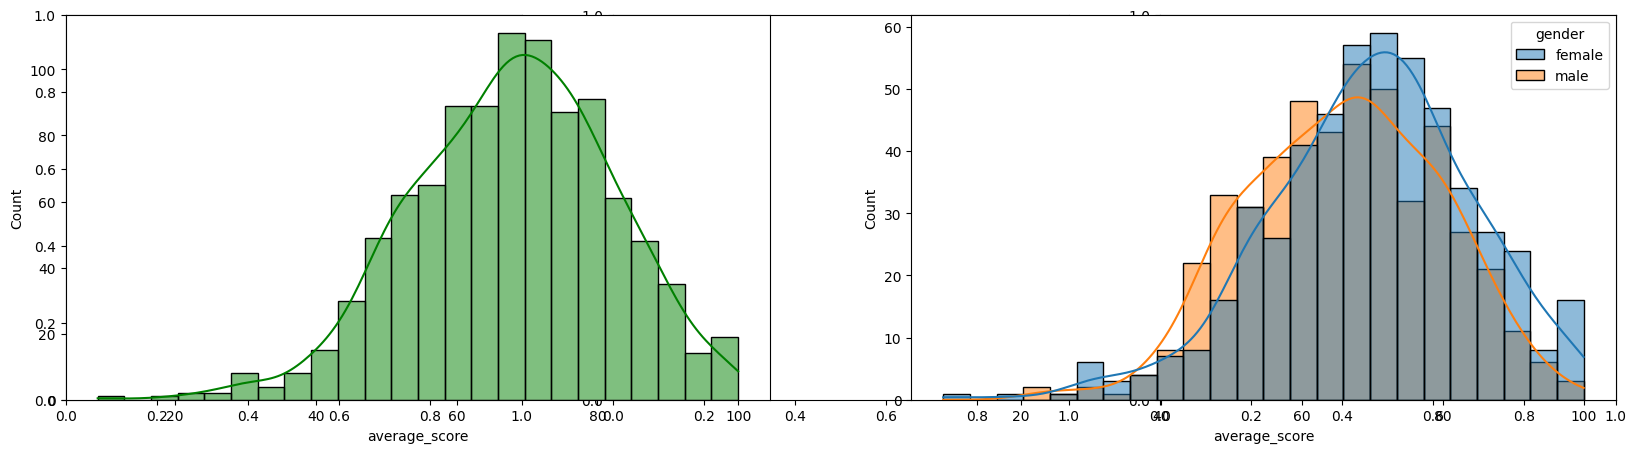

In [34]:
fig , ax  = plt.subplots(1, 3, figsize=(20, 5))
plt.subplot(121)
sns.histplot(data=df , x='average_score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df , x='average_score', hue='gender', kde=True)
plt.show()

### Insights

* Female students tend to perform well then male students.

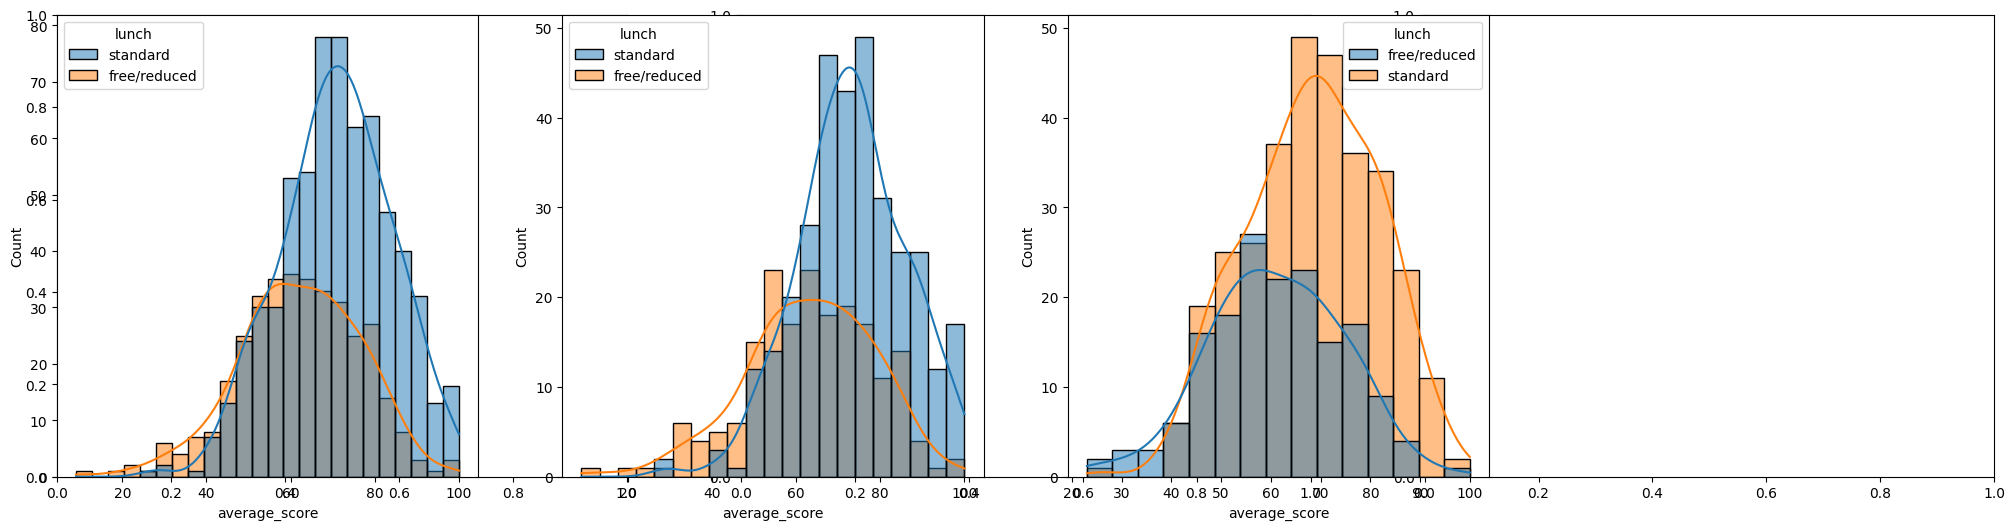

In [35]:
fig , ax  = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df , x='average_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'] , x='average_score', hue='lunch', kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'] , x='average_score', hue='lunch', kde=True)
plt.show()

C:\Users\ashraf\AppData\Local\Temp\ipykernel_14856\2174668443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')


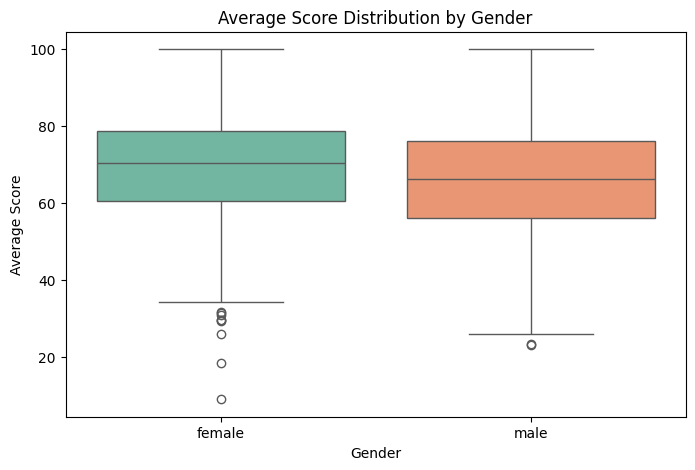

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')
plt.title('Average Score Distribution by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.show()

C:\Users\ashraf\AppData\Local\Temp\ipykernel_14856\123701864.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='average_score', data=df, ci=None, palette='pastel')
C:\Users\ashraf\AppData\Local\Temp\ipykernel_14856\123701864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='average_score', data=df, ci=None, palette='pastel')


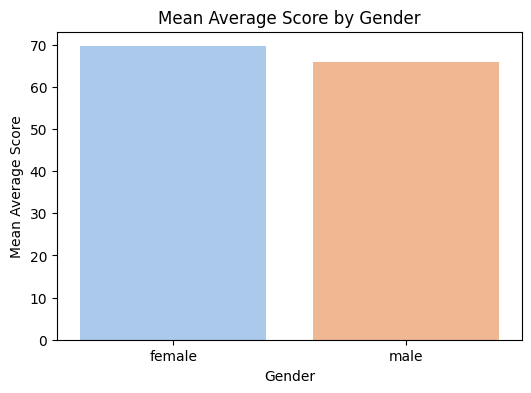

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='average_score', data=df, ci=None, palette='pastel')
plt.title('Mean Average Score by Gender')
plt.ylabel('Mean Average Score')
plt.xlabel('Gender')
plt.show()